<a href="https://colab.research.google.com/github/arunprasath2007/FrameworkILoveAndToExperiment/blob/master/fastai_imageregression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install fastbook
import fastbook
fastbook.setup_book()

     |████████████████████████████████| 727kB 11.6MB/s 
     |████████████████████████████████| 194kB 14.5MB/s 
     |████████████████████████████████| 1.1MB 49.0MB/s 
     |████████████████████████████████| 51kB 8.6MB/s 
     |████████████████████████████████| 51kB 9.1MB/s 
     |████████████████████████████████| 51kB 8.8MB/s 
     |████████████████████████████████| 40kB 6.4MB/s 
     |████████████████████████████████| 92kB 14.0MB/s 
     |████████████████████████████████| 61kB 11.0MB/s 
     |████████████████████████████████| 51kB 8.9MB/s 
     |████████████████████████████████| 2.6MB 55.1MB/s 
  Found existing installation: fastai 1.0.61
    Uninstalling fastai-1.0.61:
      Successfully uninstalled fastai-1.0.61
Mounted at /content/gdrive


In [2]:
from fastbook import *

In [3]:
path = untar_data(URLs.BIWI_HEAD_POSE)
path

Path('/root/.fastai/data/biwi_head_pose')

In [4]:
Path.BASE_PATH = path

In [5]:
path.ls().sorted()

(#50) [Path('01'),Path('01.obj'),Path('02'),Path('02.obj'),Path('03'),Path('03.obj'),Path('04'),Path('04.obj'),Path('05'),Path('05.obj')...]

In [6]:
(path/'01').ls().sorted()

(#1000) [Path('01/depth.cal'),Path('01/frame_00003_pose.txt'),Path('01/frame_00003_rgb.jpg'),Path('01/frame_00004_pose.txt'),Path('01/frame_00004_rgb.jpg'),Path('01/frame_00005_pose.txt'),Path('01/frame_00005_rgb.jpg'),Path('01/frame_00006_pose.txt'),Path('01/frame_00006_rgb.jpg'),Path('01/frame_00007_pose.txt')...]

In [7]:
img_files = get_image_files(path)
def img2pose(x): return Path(f'{str(x)[:-7]}pose.txt')
img2pose(img_files[0])

Path('01/frame_00469_pose.txt')

In [8]:
cal = np.genfromtxt(path/'01'/'rgb.cal', skip_footer=6)
def get_ctr(f):
    ctr = np.genfromtxt(img2pose(f), skip_header=3)
    c1 = ctr[0] * cal[0][0]/ctr[2] + cal[0][2]
    c2 = ctr[1] * cal[1][1]/ctr[2] + cal[1][2]
    return tensor([c1,c2])

In [9]:
get_ctr(img_files[0])

tensor([395.6780, 301.3034])

In [10]:

im = PILImage.create(img_files[0])
im.shape

(480, 640)

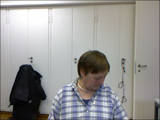

In [11]:
im.to_thumb(160)

In [12]:
block = DataBlock(blocks=(ImageBlock, PointBlock),
                  get_items=get_image_files,
                  get_y=get_ctr,
                  splitter=FuncSplitter(lambda o: o.parent.name == '13'),
                  batch_tfms=[*aug_transforms(size=(240, 320)),
                              Normalize.from_stats(*imagenet_stats)])

dls = block.dataloaders(path)

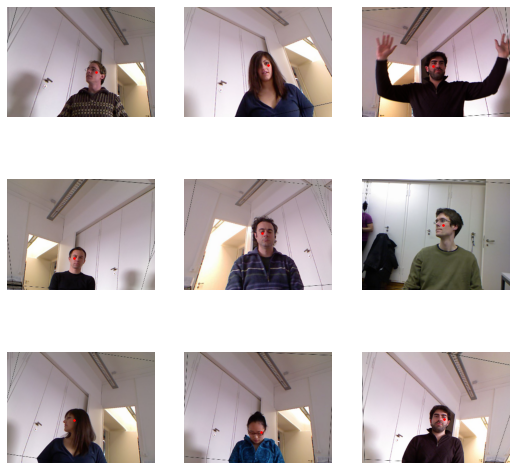

In [13]:
dls.show_batch()

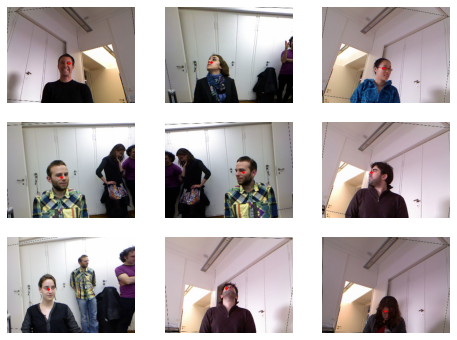

In [14]:
dls.show_batch(max_n=9, figsize=(8,6))

In [15]:
xb,yb = dls.one_batch()
xb.shape, yb.shape

(torch.Size([64, 3, 240, 320]), torch.Size([64, 1, 2]))

In [16]:
learn = cnn_learner(dls, resnet18, y_range=(-1, 1))


Downloading: "https://download.pytorch.org/models/resnet18-5c106cde.pth" to /root/.cache/torch/hub/checkpoints/resnet18-5c106cde.pth


In [17]:
learn.loss_func

FlattenedLoss of MSELoss()

SuggestedLRs(lr_min=0.005754399299621582, lr_steep=0.03981071710586548)

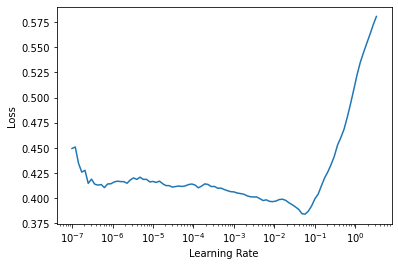

In [18]:
learn.lr_find()

In [19]:
learn.fine_tune(3, 1e-2)

epoch,train_loss,valid_loss,time
0,0.047737,0.002443,01:59


epoch,train_loss,valid_loss,time
0,0.007782,0.007352,02:09
1,0.002874,0.001152,02:09
2,0.001530,0.000275,02:09


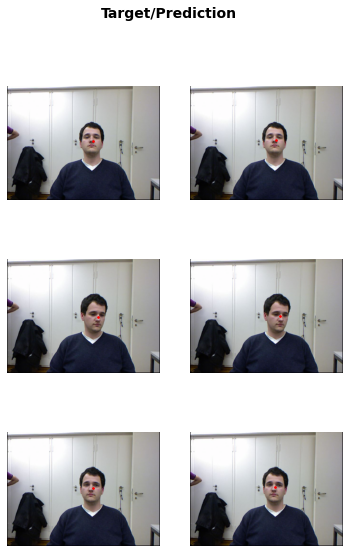

In [20]:
learn.show_results()